In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/ISHA/Desktop/Datasets/adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


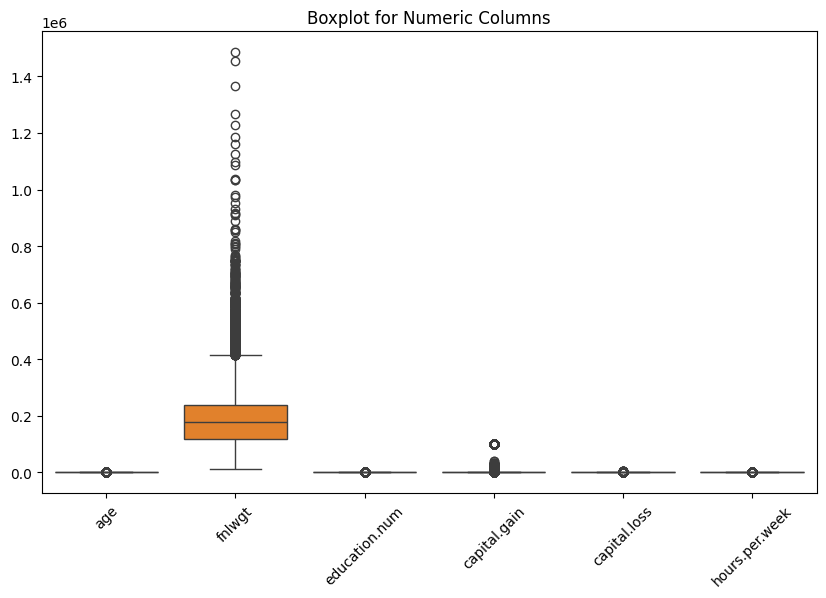

In [17]:
numeric_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [19]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

df_no_outliers = df[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df.shape)
print("Dataset after outlier removal:", df_no_outliers.shape)

Dataset before outlier removal: (32561, 15)
Dataset after outlier removal: (18997, 15)


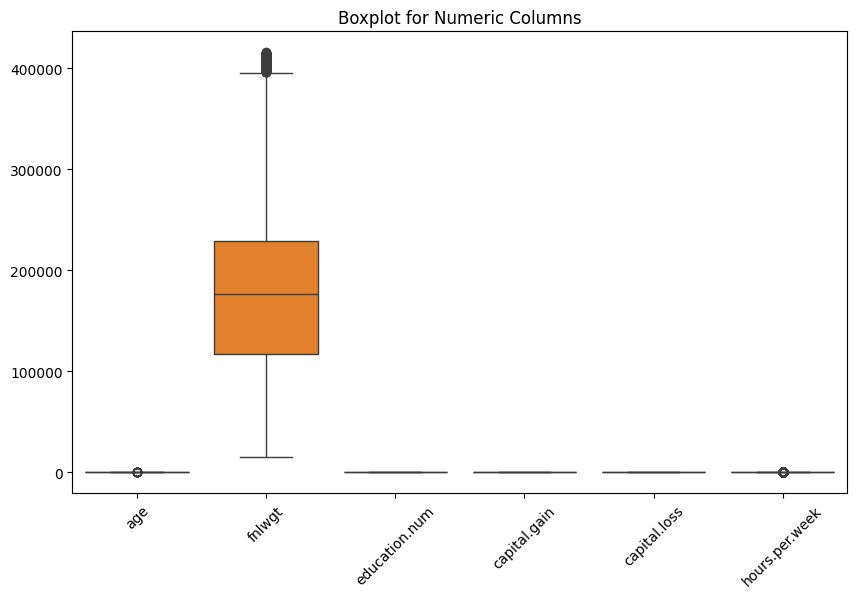

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns=['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df[numeric_columns].head() 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,1.000000,0.043987,0.533333,0.0,1.000000,0.397959
1,0.890411,0.081896,0.533333,0.0,1.000000,0.173469
2,0.671233,0.118021,0.600000,0.0,1.000000,0.397959
3,0.506849,0.086982,0.200000,0.0,0.895317,0.397959
4,0.328767,0.171404,0.600000,0.0,0.895317,0.397959


In [23]:
df["age"].mean()

np.float64(0.2956389966482299)

In [24]:
df["age"].median()

np.float64(0.27397260273972607)

In [25]:
df["age"].mode()

0    0.260274
Name: age, dtype: float64

In [26]:
df["age"].std()

np.float64(0.18685524046001836)

In [27]:
df["age"].min()

np.float64(0.0)

In [28]:
df["age"].max()

np.float64(1.0)

In [29]:
df.groupby("income")["age"].mean()

income
<=50K    0.271010
>50K     0.373285
Name: age, dtype: float64

In [30]:
df.groupby("income")["age"].median()

income
<=50K    0.232877
>50K     0.369863
Name: age, dtype: float64

In [31]:
df.groupby("income")["age"].std()

income
<=50K    0.192056
>50K     0.144096
Name: age, dtype: float64

In [32]:
df.groupby("income")["age"].max()

income
<=50K    1.0
>50K     1.0
Name: age, dtype: float64

In [33]:
df.groupby("income")["age"].min()

income
<=50K    0.000000
>50K     0.027397
Name: age, dtype: float64

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [35]:
df = pd.read_csv("C:/Users/ISHA/Desktop/Datasets/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

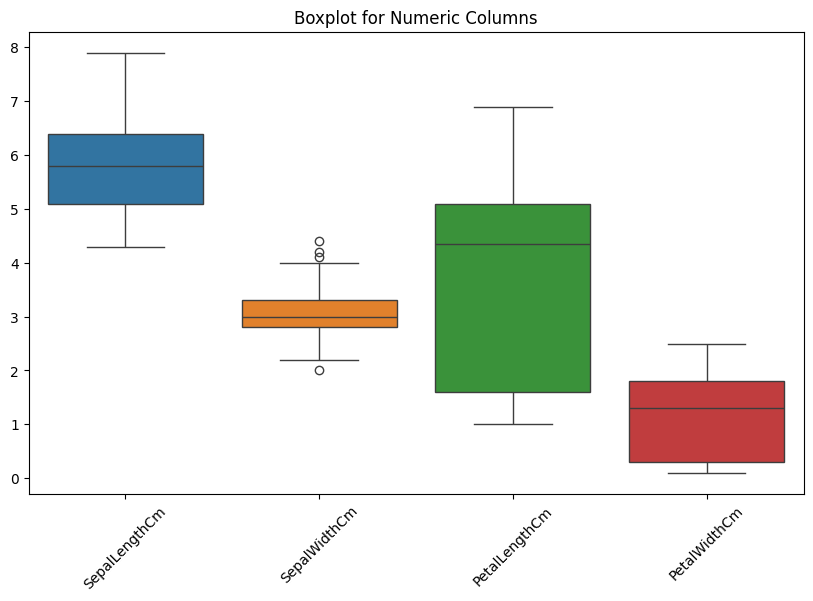

In [39]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [40]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)

df_no_outliers = df[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df.shape)
print("Dataset after outlier removal:", df_no_outliers.shape)

Dataset before outlier removal: (150, 6)
Dataset after outlier removal: (146, 6)


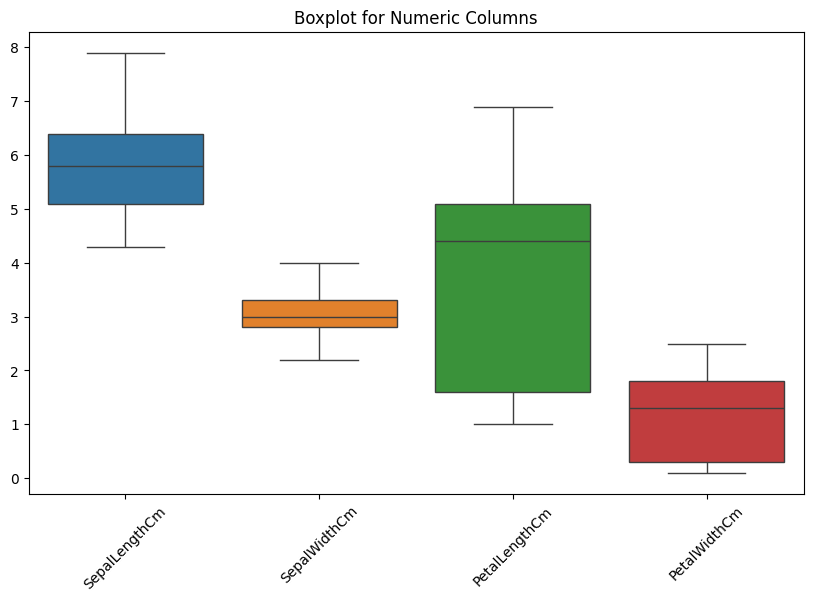

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [43]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols].head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [45]:
print(df.columns.tolist())

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [46]:
setosa=df[df['Species']=='Iris-setosa']
versicolor=df[df['Species']=='Iris-versicolor']
virginica=df[df['Species']=='Iris-virginica'] 

In [47]:
df.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,0.196111,0.590833,0.078644,0.060000
Iris-versicolor,75.5,0.454444,0.320833,0.552542,0.510833
Iris-virginica,125.5,0.635556,0.405833,0.771525,0.802500


In [48]:
df.groupby('Species').median() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,0.194444,0.583333,0.084746,0.041667
Iris-versicolor,75.5,0.444444,0.333333,0.567797,0.500000
Iris-virginica,125.5,0.611111,0.416667,0.771186,0.791667


In [49]:
df.groupby('Species').std()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,14.57738,0.097914,0.158760,0.029409,0.044671
Iris-versicolor,14.57738,0.143381,0.130749,0.079646,0.082397
Iris-virginica,14.57738,0.176633,0.134374,0.093541,0.114438


In [50]:
df.groupby('Species').quantile(0.25)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,13.25,0.138889,0.468750,0.067797,0.041667
Iris-versicolor,63.25,0.361111,0.218750,0.508475,0.458333
Iris-virginica,113.25,0.534722,0.333333,0.694915,0.708333


In [51]:
df.groupby('Species').quantile(0.75)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,37.75,0.250000,0.697917,0.097458,0.083333
Iris-versicolor,87.75,0.555556,0.416667,0.610169,0.583333
Iris-virginica,137.75,0.722222,0.489583,0.826271,0.916667


In [52]:
df.groupby('Species').min()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,0.000000,0.125000,0.000000,0.000000
Iris-versicolor,51,0.166667,0.000000,0.338983,0.375000
Iris-virginica,101,0.166667,0.083333,0.593220,0.541667


In [53]:
df.groupby('Species').max()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,0.416667,1.000000,0.152542,0.208333
Iris-versicolor,100,0.750000,0.583333,0.694915,0.708333
Iris-virginica,150,1.000000,0.750000,1.000000,1.000000


In [55]:
setosa.mean(numeric_only=True)

Id               25.500000
SepalLengthCm     0.196111
SepalWidthCm      0.590833
PetalLengthCm     0.078644
PetalWidthCm      0.060000
dtype: float64

In [56]:
setosa.median(numeric_only=True)

Id               25.500000
SepalLengthCm     0.194444
SepalWidthCm      0.583333
PetalLengthCm     0.084746
PetalWidthCm      0.041667
dtype: float64

In [57]:
setosa.std(numeric_only=True)

Id               14.577380
SepalLengthCm     0.097914
SepalWidthCm      0.158760
PetalLengthCm     0.029409
PetalWidthCm      0.044671
dtype: float64

In [58]:
virginica.std(numeric_only=True)

Id               14.577380
SepalLengthCm     0.176633
SepalWidthCm      0.134374
PetalLengthCm     0.093541
PetalWidthCm      0.114438
dtype: float64

In [59]:
virginica.mean(numeric_only=True)

Id               125.500000
SepalLengthCm      0.635556
SepalWidthCm       0.405833
PetalLengthCm      0.771525
PetalWidthCm       0.802500
dtype: float64

In [60]:
virginica.median(numeric_only=True)

Id               125.500000
SepalLengthCm      0.611111
SepalWidthCm       0.416667
PetalLengthCm      0.771186
PetalWidthCm       0.791667
dtype: float64

In [61]:
versicolor.median(numeric_only=True)

Id               75.500000
SepalLengthCm     0.444444
SepalWidthCm      0.333333
PetalLengthCm     0.567797
PetalWidthCm      0.500000
dtype: float64

In [62]:
versicolor.mean(numeric_only=True)

Id               75.500000
SepalLengthCm     0.454444
SepalWidthCm      0.320833
PetalLengthCm     0.552542
PetalWidthCm      0.510833
dtype: float64

In [64]:
versicolor.median(numeric_only=True)

Id               75.500000
SepalLengthCm     0.444444
SepalWidthCm      0.333333
PetalLengthCm     0.567797
PetalWidthCm      0.500000
dtype: float64

In [63]:
versicolor.std(numeric_only=True)

Id               14.577380
SepalLengthCm     0.143381
SepalWidthCm      0.130749
PetalLengthCm     0.079646
PetalWidthCm      0.082397
dtype: float64